In [1]:
# import modules used in the analysis
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model as lm
from sklearn import svm
from sklearn.metrics import mean_squared_error
import math
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as kr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics



In [2]:
ds = pd.read_csv("dataset.csv")

In [3]:
ds.info() # display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [4]:
ds.describe()


,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


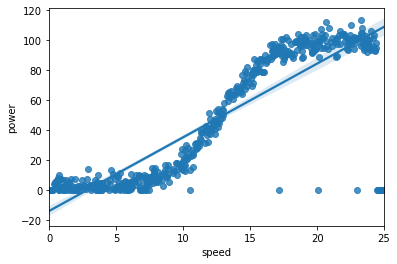

In [5]:
sns.regplot(x='speed',y='power',data = ds) # regplot to visualise a simple linear regression
plt.show()


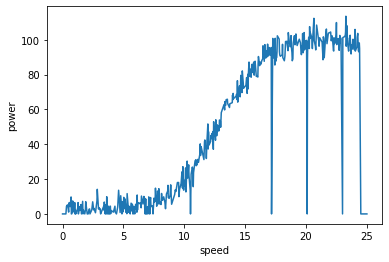

In [6]:
sns.lineplot(x='speed',y='power',data = ds) # lineplot clearly shows the occurances of 0.0 m/s wind speed.
plt.show()


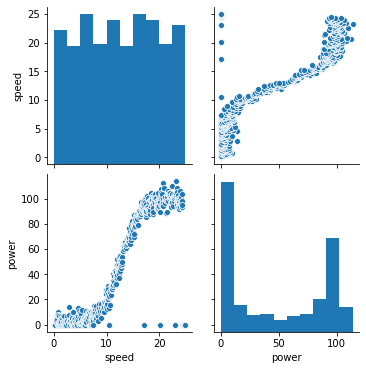

In [7]:
sns.pairplot(ds) # pairplot - showing data comparisions

In [8]:
ds.corr()

,speed,power
speed,1.000000,0.853778
power,0.853778,1.000000


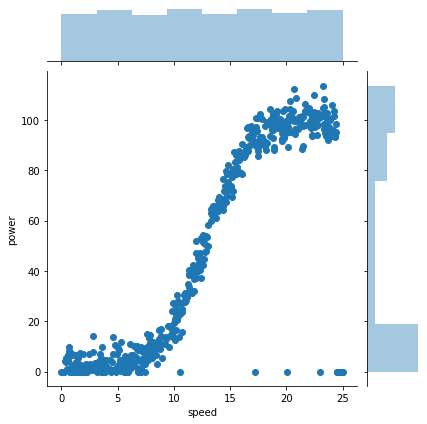

In [11]:
sns.jointplot(x='speed',y='power', data = ds) # jointplot - clearly shows correlation between speed and power

### Cleaning the dataset

In [12]:
ds[ds.power == 0].count()

speed    49
power    49
dtype: int64

In [13]:
# Select data from speed & power = to 0.
clean_ds = ds[(ds["speed"]==0) & (ds["power"]==0)]

# Values where values are greater than 0
above_zero = ds[(ds["speed"]>0) & (ds["power"]>0)]

# Append data 
clean_ds = clean_ds.append(above_zero)

clean_ds

,speed,power
0,0.000,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


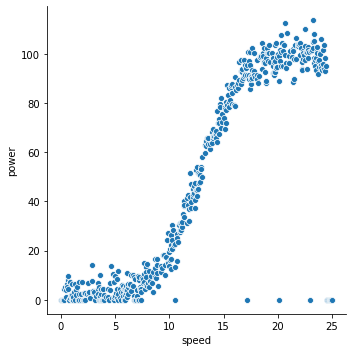

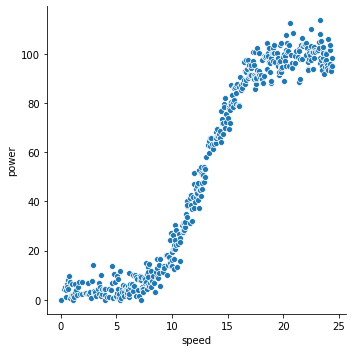

In [14]:
sns.relplot(x="speed", y="power", data=ds);
sns.relplot(x="speed", y="power", data=clean_ds);

#### second pic shows the cleaned dataset. Now could visualise both datasets

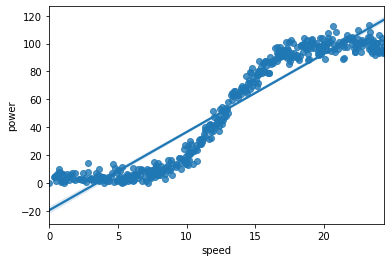

In [15]:
# Pick out two variables.
power = clean_ds[["speed", "power"]].dropna()
# Scatter and fit line for just those two variables.
sns.regplot(x="speed", y="power", data=clean_ds)

### Linear Regression
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable, and the other is considered to be a dependent variable

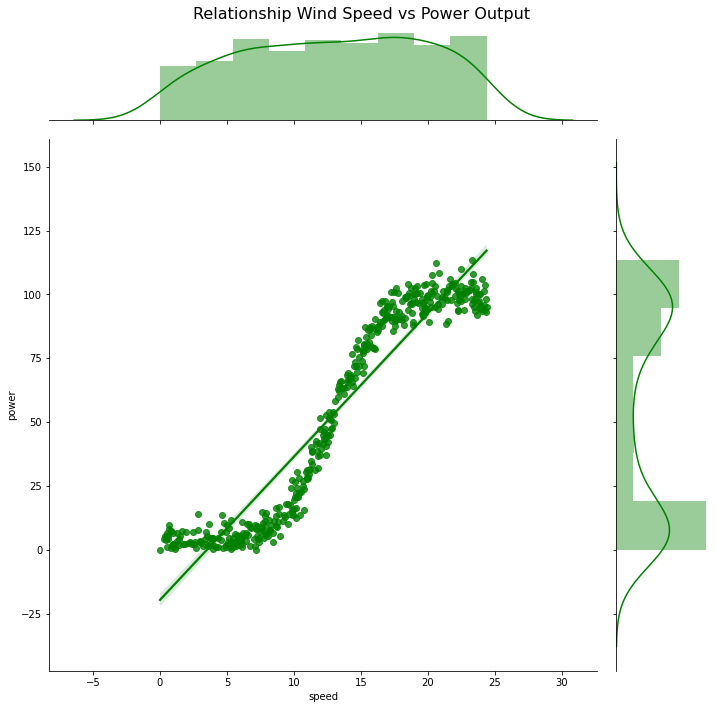

In [17]:
plot = sns.jointplot(x="speed", y="power",kind="reg", color="g", height=10, data=clean_ds) # plot relationship between speed and power

plt.subplots_adjust(top=0.95)
plt.suptitle("Relationship Wind Speed vs Power Output", fontsize = 16)

plt.show()

In [18]:
import sklearn.linear_model as lin # creating linear regression correlation

x = clean_ds["speed"].to_numpy()
y = clean_ds["power"].to_numpy()

x = x.reshape(-1, 1)

model = lin.LinearRegression()
model.fit(x, y)
r = model.score(x, y)
p = [model.intercept_, model.coef_[0]]

In [19]:
print(r)

0.8983450728341917


In [20]:
print(p)

[-19.636232996770858, 5.606684691495636]


In [21]:
def f(x, p):
    return p[0] + x * p[1]

In [22]:
def predict(x):
    return f(x,p)

In [23]:
# predict power output at different windspeeds...
f(13,p)

53.25066799267242

In [24]:
predict(5)

8.397190460707325

In [25]:
predict(10)

36.43061391818551

In [26]:
predict(20)

92.49746083314187

In [27]:
predict(24.49)

117.67147509795727

In [28]:
import numpy as np
x = clean_ds["speed"].to_numpy()
y = clean_ds["power"].to_numpy()

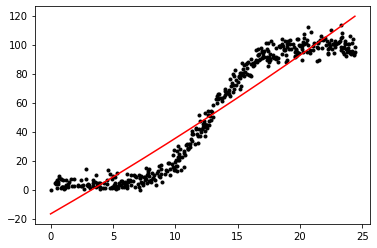

In [29]:
# plot linear regression correlation of power and speed
a,b,c = np.polyfit(x,y,2)
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x + b * x  +  c , 'r-');

In [30]:
a, b, c , d = np.polyfit(x, y, 3) # display the polynominal fit of the data

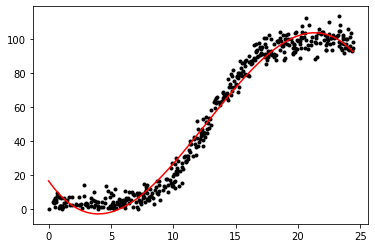

In [31]:
plt.plot(x, y, 'k.')
plt.plot(x, a * x * x * x + b * x *x  +  c * x + d, 'r-');

#  Neural Networks Model¶

In [32]:
dataset = clean_ds.values # import clean dataset

In [33]:
dataset

array([[0.00000e+00, 0.00000e+00],
       [3.25000e-01, 4.33100e+00],
       [4.00000e-01, 5.18600e+00],
       [4.50000e-01, 3.82600e+00],
       [5.01000e-01, 1.04800e+00],
       [5.26000e-01, 5.55300e+00],
       [5.51000e-01, 6.49800e+00],
       [5.76000e-01, 5.24100e+00],
       [6.26000e-01, 4.22000e+00],
       [6.76000e-01, 7.97400e+00],
       [7.01000e-01, 9.74600e+00],
       [8.01000e-01, 7.27100e+00],
       [8.26000e-01, 7.95000e-01],
       [8.51000e-01, 7.35000e+00],
       [9.26000e-01, 1.99600e+00],
       [9.51000e-01, 1.60900e+00],
       [9.76000e-01, 2.06400e+00],
       [1.00100e+00, 6.51100e+00],
       [1.05100e+00, 2.08500e+00],
       [1.10100e+00, 1.21000e-01],
       [1.15100e+00, 1.20800e+00],
       [1.25100e+00, 3.37300e+00],
       [1.27600e+00, 6.51000e+00],
       [1.40100e+00, 4.15600e+00],
       [1.42600e+00, 2.00500e+00],
       [1.50200e+00, 5.35200e+00],
       [1.65200e+00, 7.22100e+00],
       [1.70200e+00, 2.43900e+00],
       [1.87700e+00,

## Fitting and training the model

In [34]:
X = dataset[:,0:1]
Y = dataset[:,1]
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.        ],
       [0.01332022],
       [0.01639411],
       [0.01844338],
       [0.02053363],
       [0.02155826],
       [0.02258289],
       [0.02360752],
       [0.02565679],
       [0.02770605],
       [0.02873069],
       [0.03282921],
       [0.03385385],
       [0.03487848],
       [0.03795238],
       [0.03897701],
       [0.04000164],
       [0.04102627],
       [0.04307554],
       [0.0451248 ],
       [0.04717406],
       [0.05127259],
       [0.05229723],
       [0.05742039],
       [0.05844502],
       [0.0615599 ],
       [0.06770769],
       [0.06975696],
       [0.07692938],
       [0.07795401],
       [0.08922497],
       [0.09127423],
       [0.09844666],
       [0.10152055],
       [0.10463544],
       [0.10566007],
       [0.11078323],
       [0.11590639],
       [0.11693102],
       [0.12102955],
       [0.12307881],
       [0.12410345],
       [0.12512808],
       [0.12615271],
       [0.13127587],
       [0.1384483 ],
       [0.13947293],
       [0.140

In [35]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3) # train the data

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

model = kr.models.Sequential() # creeating a sequential nural network model
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))
model.add(kr.layers.Dense(1, input_shape=(1,), activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

model.compile(optimizer='adam', loss='mean_squared_error') #

model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 4ms/step - loss: 4255.9854
Epoch 2/500
10/10 [==============================] - 0s 2ms/step - loss: 4252.4233
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 4248.9429
Epoch 4/500
10/10 [==============================] - 0s 2ms/step - loss: 4245.2510
Epoch 5/500
10/10 [==============================] - 0s 2ms/step - loss: 4241.5728
Epoch 6/500
10/10 [==============================] - 0s 2ms/step - loss: 4237.9297
Epoch 7/500
10/10 [==============================] - 0s 2ms/step - loss: 4234.1147
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 4230.3379
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 4226.3008
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 4222.4229
Epoch 11/500
10/10 [==============================] - 0s 2ms/step - loss: 4218.4810
Epoch 12/500
10/10 [==============================] - 0s 2ms/step - loss: 4214.3228
E

10/10 [==============================] - 0s 2ms/step - loss: 3670.6555
Epoch 98/500
10/10 [==============================] - 0s 1ms/step - loss: 3662.1047
Epoch 99/500
10/10 [==============================] - 0s 2ms/step - loss: 3653.5842
Epoch 100/500
10/10 [==============================] - 0s 1ms/step - loss: 3644.8916
Epoch 101/500
10/10 [==============================] - 0s 1ms/step - loss: 3636.2729
Epoch 102/500
10/10 [==============================] - 0s 1ms/step - loss: 3627.6296
Epoch 103/500
10/10 [==============================] - 0s 1ms/step - loss: 3619.0244
Epoch 104/500
10/10 [==============================] - 0s 2ms/step - loss: 3610.1633
Epoch 105/500
10/10 [==============================] - 0s 1ms/step - loss: 3601.5183
Epoch 106/500
10/10 [==============================] - 0s 1ms/step - loss: 3592.4993
Epoch 107/500
10/10 [==============================] - 0s 2ms/step - loss: 3583.8254
Epoch 108/500
10/10 [==============================] - 0s 1ms/step - loss: 3575.0

10/10 [==============================] - 0s 1ms/step - loss: 1863.0122
Epoch 289/500
10/10 [==============================] - 0s 1ms/step - loss: 1854.8129
Epoch 290/500
10/10 [==============================] - 0s 1ms/step - loss: 1846.6211
Epoch 291/500
10/10 [==============================] - 0s 1ms/step - loss: 1838.7644
Epoch 292/500
10/10 [==============================] - 0s 1ms/step - loss: 1830.7472
Epoch 293/500
10/10 [==============================] - 0s 1ms/step - loss: 1822.8671
Epoch 294/500
10/10 [==============================] - 0s 1ms/step - loss: 1814.9205
Epoch 295/500
10/10 [==============================] - 0s 1ms/step - loss: 1807.1390
Epoch 296/500
10/10 [==============================] - 0s 1ms/step - loss: 1799.1284
Epoch 297/500
10/10 [==============================] - 0s 1ms/step - loss: 1791.5306
Epoch 298/500
10/10 [==============================] - 0s 1ms/step - loss: 1783.6681
Epoch 299/500
10/10 [==============================] - 0s 1ms/step - loss: 1775

10/10 [==============================] - 0s 1ms/step - loss: 1254.7771
Epoch 385/500
10/10 [==============================] - 0s 1ms/step - loss: 1250.3567
Epoch 386/500
10/10 [==============================] - 0s 1ms/step - loss: 1245.8383
Epoch 387/500
10/10 [==============================] - 0s 1ms/step - loss: 1241.5177
Epoch 388/500
10/10 [==============================] - 0s 1ms/step - loss: 1237.1469
Epoch 389/500
10/10 [==============================] - 0s 1ms/step - loss: 1232.8066
Epoch 390/500
10/10 [==============================] - 0s 1ms/step - loss: 1228.3240
Epoch 391/500
10/10 [==============================] - 0s 1ms/step - loss: 1224.3099
Epoch 392/500
10/10 [==============================] - 0s 1ms/step - loss: 1219.8896
Epoch 393/500
10/10 [==============================] - 0s 1ms/step - loss: 1215.8087
Epoch 394/500
10/10 [==============================] - 0s 1000us/step - loss: 1211.5719
Epoch 395/500
10/10 [==============================] - 0s 1ms/step - loss: 1

10/10 [==============================] - 0s 1000us/step - loss: 977.8285
Epoch 479/500
10/10 [==============================] - 0s 1ms/step - loss: 976.1393
Epoch 480/500
10/10 [==============================] - 0s 1ms/step - loss: 974.5414
Epoch 481/500
10/10 [==============================] - 0s 1ms/step - loss: 972.7839
Epoch 482/500
10/10 [==============================] - 0s 1ms/step - loss: 971.4067
Epoch 483/500
10/10 [==============================] - 0s 1ms/step - loss: 969.6191
Epoch 484/500
10/10 [==============================] - 0s 1ms/step - loss: 968.1465
Epoch 485/500
10/10 [==============================] - 0s 2ms/step - loss: 966.6421
Epoch 486/500
10/10 [==============================] - 0s 2ms/step - loss: 964.9829
Epoch 487/500
10/10 [==============================] - 0s 2ms/step - loss: 963.4592
Epoch 488/500
10/10 [==============================] - 0s 1ms/step - loss: 962.0551
Epoch 489/500
10/10 [==============================] - 0s 2ms/step - loss: 960.4949
Epo

In [36]:
model.predict([1.0,2.0,3.0]) # data predict using model

array([[ 68.17861],
       [105.49022],
       [142.80185]], dtype=float32)

In [37]:
model = kr.models.Sequential()
# adapted from https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/

In [38]:
model.add(kr.layers.Dense(1, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

In [39]:
model.compile('adam', loss='mean_squared_error')

In [40]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 1ms/step - loss: 4294.7051
Epoch 2/500
46/46 [==============================] - 0s 1ms/step - loss: 4290.0981
Epoch 3/500
46/46 [==============================] - 0s 1ms/step - loss: 4285.5205
Epoch 4/500
46/46 [==============================] - 0s 1ms/step - loss: 4280.8721
Epoch 5/500
46/46 [==============================] - 0s 1ms/step - loss: 4276.2886
Epoch 6/500
46/46 [==============================] - 0s 1ms/step - loss: 4271.6733
Epoch 7/500
46/46 [==============================] - 0s 1ms/step - loss: 4267.1230
Epoch 8/500
46/46 [==============================] - 0s 1ms/step - loss: 4262.5786
Epoch 9/500
46/46 [==============================] - 0s 956us/step - loss: 4258.0288
Epoch 10/500
46/46 [==============================] - 0s 935us/step - loss: 4253.4614
Epoch 11/500
46/46 [==============================] - 0s 1ms/step - loss: 4248.9810
Epoch 12/500
46/46 [==============================] - 0s 1ms/step - loss: 4244.43

46/46 [==============================] - 0s 1ms/step - loss: 2707.3301
Epoch 192/500
46/46 [==============================] - 0s 1ms/step - loss: 2701.0591
Epoch 193/500
46/46 [==============================] - 0s 1ms/step - loss: 2694.8132
Epoch 194/500
46/46 [==============================] - 0s 848us/step - loss: 2688.3931
Epoch 195/500
46/46 [==============================] - 0s 783us/step - loss: 2682.2727
Epoch 196/500
46/46 [==============================] - 0s 891us/step - loss: 2676.0640
Epoch 197/500
46/46 [==============================] - 0s 870us/step - loss: 2669.8022
Epoch 198/500
46/46 [==============================] - 0s 826us/step - loss: 2663.5557
Epoch 199/500
46/46 [==============================] - 0s 826us/step - loss: 2657.2456
Epoch 200/500
46/46 [==============================] - 0s 1ms/step - loss: 2651.0925
Epoch 201/500
46/46 [==============================] - 0s 1ms/step - loss: 2644.9524
Epoch 202/500
46/46 [==============================] - 0s 1ms/step 

Epoch 286/500
46/46 [==============================] - 0s 1000us/step - loss: 2156.5823
Epoch 287/500
46/46 [==============================] - 0s 1ms/step - loss: 2151.2415
Epoch 288/500
46/46 [==============================] - 0s 1ms/step - loss: 2146.0217
Epoch 289/500
46/46 [==============================] - 0s 935us/step - loss: 2140.7234
Epoch 290/500
46/46 [==============================] - 0s 913us/step - loss: 2135.5188
Epoch 291/500
46/46 [==============================] - 0s 913us/step - loss: 2130.2117
Epoch 292/500
46/46 [==============================] - 0s 913us/step - loss: 2124.8960
Epoch 293/500
46/46 [==============================] - 0s 804us/step - loss: 2119.8328
Epoch 294/500
46/46 [==============================] - 0s 804us/step - loss: 2114.5610
Epoch 295/500
46/46 [==============================] - 0s 826us/step - loss: 2109.2625
Epoch 296/500
46/46 [==============================] - 0s 870us/step - loss: 2104.0215
Epoch 297/500
46/46 [=========================

46/46 [==============================] - 0s 935us/step - loss: 1702.9678
Epoch 381/500
46/46 [==============================] - 0s 848us/step - loss: 1698.5740
Epoch 382/500
46/46 [==============================] - 0s 826us/step - loss: 1694.2566
Epoch 383/500
46/46 [==============================] - 0s 870us/step - loss: 1689.9669
Epoch 384/500
46/46 [==============================] - 0s 826us/step - loss: 1685.5652
Epoch 385/500
46/46 [==============================] - 0s 826us/step - loss: 1681.2142
Epoch 386/500
46/46 [==============================] - 0s 870us/step - loss: 1676.9519
Epoch 387/500
46/46 [==============================] - 0s 804us/step - loss: 1672.5918
Epoch 388/500
46/46 [==============================] - 0s 804us/step - loss: 1668.1958
Epoch 389/500
46/46 [==============================] - 0s 848us/step - loss: 1663.8152
Epoch 390/500
46/46 [==============================] - 0s 848us/step - loss: 1659.5789
Epoch 391/500
46/46 [==============================] - 0s

In [41]:
model = kr.models.Sequential()
model.add(kr.layers.Dense(9, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.compile('adam', loss='mean_squared_error')

In [42]:
model.fit(x, y, epochs=500, batch_size=10)

Epoch 1/500
46/46 [==============================] - 0s 1ms/step - loss: 4557.7983
Epoch 2/500
46/46 [==============================] - 0s 1ms/step - loss: 4507.3052
Epoch 3/500
46/46 [==============================] - 0s 1ms/step - loss: 4449.5469
Epoch 4/500
46/46 [==============================] - 0s 978us/step - loss: 4372.6602
Epoch 5/500
46/46 [==============================] - 0s 1ms/step - loss: 4304.8750
Epoch 6/500
46/46 [==============================] - 0s 1ms/step - loss: 4255.6123
Epoch 7/500
46/46 [==============================] - 0s 1ms/step - loss: 4193.0034
Epoch 8/500
46/46 [==============================] - 0s 1ms/step - loss: 4049.2202
Epoch 9/500
46/46 [==============================] - 0s 1ms/step - loss: 3922.8035
Epoch 10/500
46/46 [==============================] - 0s 1ms/step - loss: 3856.9568
Epoch 11/500
46/46 [==============================] - 0s 1ms/step - loss: 3806.1128
Epoch 12/500
46/46 [==============================] - 0s 1ms/step - loss: 3761.2644

46/46 [==============================] - 0s 870us/step - loss: 1593.3237
Epoch 99/500
46/46 [==============================] - 0s 870us/step - loss: 1575.6019
Epoch 100/500
46/46 [==============================] - 0s 935us/step - loss: 1557.8290
Epoch 101/500
46/46 [==============================] - 0s 870us/step - loss: 1540.5355
Epoch 102/500
46/46 [==============================] - 0s 804us/step - loss: 1523.4738
Epoch 103/500
46/46 [==============================] - 0s 1000us/step - loss: 1505.7550
Epoch 104/500
46/46 [==============================] - 0s 1ms/step - loss: 1488.1555
Epoch 105/500
46/46 [==============================] - 0s 1ms/step - loss: 1471.2264
Epoch 106/500
46/46 [==============================] - 0s 1ms/step - loss: 1454.6548
Epoch 107/500
46/46 [==============================] - 0s 1ms/step - loss: 1437.3844
Epoch 108/500
46/46 [==============================] - 0s 848us/step - loss: 1420.5787
Epoch 109/500
46/46 [==============================] - 0s 848us/s

46/46 [==============================] - 0s 891us/step - loss: 36.8942
Epoch 290/500
46/46 [==============================] - 0s 826us/step - loss: 35.9668
Epoch 291/500
46/46 [==============================] - 0s 826us/step - loss: 35.0283
Epoch 292/500
46/46 [==============================] - 0s 826us/step - loss: 33.9936
Epoch 293/500
46/46 [==============================] - 0s 913us/step - loss: 33.0979
Epoch 294/500
46/46 [==============================] - 0s 913us/step - loss: 32.2623
Epoch 295/500
46/46 [==============================] - 0s 848us/step - loss: 31.4296
Epoch 296/500
46/46 [==============================] - 0s 848us/step - loss: 30.6371
Epoch 297/500
46/46 [==============================] - 0s 2ms/step - loss: 29.8291
Epoch 298/500
46/46 [==============================] - 0s 2ms/step - loss: 29.1312
Epoch 299/500
46/46 [==============================] - 0s 1ms/step - loss: 28.4203
Epoch 300/500
46/46 [==============================] - 0s 1ms/step - loss: 27.7609
Ep

Epoch 482/500
46/46 [==============================] - 0s 892us/step - loss: 16.8229
Epoch 483/500
46/46 [==============================] - 0s 1ms/step - loss: 16.9644
Epoch 484/500
46/46 [==============================] - 0s 848us/step - loss: 16.7785
Epoch 485/500
46/46 [==============================] - 0s 848us/step - loss: 16.8060
Epoch 486/500
46/46 [==============================] - 0s 870us/step - loss: 17.0782
Epoch 487/500
46/46 [==============================] - 0s 869us/step - loss: 16.9515
Epoch 488/500
46/46 [==============================] - 0s 891us/step - loss: 16.8039
Epoch 489/500
46/46 [==============================] - 0s 848us/step - loss: 16.7867
Epoch 490/500
46/46 [==============================] - 0s 1000us/step - loss: 16.8582
Epoch 491/500
46/46 [==============================] - 0s 869us/step - loss: 16.8287
Epoch 492/500
46/46 [==============================] - 0s 1ms/step - loss: 16.7742
Epoch 493/500
46/46 [==============================] - 0s 870us/step

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [45]:
 model.save_weights("Models/wind_power_weights")
#model.save('Models/wind_power')

In [46]:
from tensorflow.keras.models import load_model # load model
new_model = load_model('Models/wind_power')

In [47]:
new_model.summary() # model summary

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 9)                 18        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 10        
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [48]:
score = model.evaluate(x, y, verbose=0)
score

16.844167709350586

In [52]:
model.predict([0.5])

array([[3.0528593]], dtype=float32)

In [53]:
model.predict([1.0])

array([[3.089182]], dtype=float32)

In [54]:
model.predict([1.5])

array([[3.1367059]], dtype=float32)

In [55]:
model.predict([2.5])

array([[3.280294]], dtype=float32)

In [56]:
model.predict([5])

array([[4.258345]], dtype=float32)

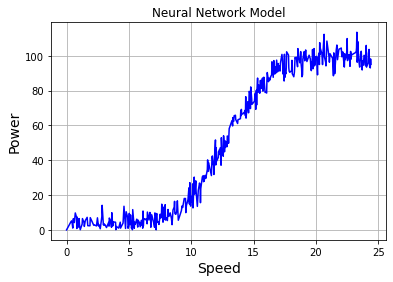

In [59]:
# plot the correaltion between speed and power used in the model
plt.plot(X, y, 'b')
plt.xlabel('Speed', fontsize='14')
plt.ylabel('Power', fontsize='14')
plt.title("Neural Network Model")
plt.grid()
#plt.legend()
plt.savefig("Images/neuralnetwork2.png")

## Random Forest 

#### Advantages:
+ Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
+ It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
+ The algorithm can be used in both classification and regression problems.
+ Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
+ It gets relative feature importance, which helps in selecting the most contributing features for the classifier.

#### Disadvantages:

+ Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
+ The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

#### Finding important features
+ Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

+ This score helps to choose the most important features and drop the least important ones for model building.

+ Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.


#### Random Forests vs Decision Trees
+ Random forests is a set of multiple decision trees.
+ Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
+ Decision trees are computationally faster.
+ Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

## References

https://www.datacamp.com/community/tutorials/random-forests-classifier-python#advantages